# <span style="color:#00bfff;">Prepocesamiento de datos</span>

## <span style="color:#00bfff;">1.</span> Limpieza y Tratamiento de datos

In [1]:
import pandas as pd

# Crear DataFrame de ejemplo con valores faltantes
df = pd.DataFrame({
    'Edad': [25, 30, None, 40, None],
    'Salario': [50000, None, 60000, 65000, None],
    'Ciudad': ['Madrid', 'Barcelona', None, 'Valencia', 'Sevilla']
})

# Eliminar filas con valores faltantes
df_sin_filas_nulas = df.dropna()

# Eliminar columnas con valores faltantes
df_sin_columnas_nulas = df.dropna(axis=1) 

print(df_sin_filas_nulas)
print(df_sin_columnas_nulas)

   Edad  Salario    Ciudad
0  25.0  50000.0    Madrid
3  40.0  65000.0  Valencia
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


### **Imputación**

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Crear DataFrame de ejemplo con valores faltantes
df = pd.DataFrame({
    'Edad': [25, 30, None, 40, None],
    'Salario': [50000, None, 60000, 65000, None],
    'Ciudad': ['Madrid', 'Barcelona', None, 'Valencia', 'Madrid']
})

# Imputación con la media para datos numéricos
imputer_media = SimpleImputer(strategy='mean')
df[['Edad', 'Salario']] = imputer_media.fit_transform(df[['Edad', 'Salario']])

# Reemplazar None por np.nan en la columna categórica
df['Ciudad'] = df['Ciudad'].replace({None: np.nan})

# Imputación con la moda para datos categóricos
imputer_moda = SimpleImputer(strategy='most_frequent')
df[['Ciudad']] = imputer_moda.fit_transform(df[['Ciudad']])

df

,Edad,Salario,Ciudad
0,25.000000,50000.000000,Madrid
1,30.000000,58333.333333,Barcelona
2,31.666667,60000.000000,Madrid
3,40.000000,65000.000000,Valencia
4,31.666667,58333.333333,Madrid


## <span style="color:#00bfff;">Detección y tratamiento de Outliers</span>

### **Método estadístico: Z-score**

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Crear 99 valores con distribución normal (media 50, std 5)
normal_values = np.random.normal(50, 5, 99)

# Añadir un outlier extremo (por ejemplo, 100)
valores = np.append(normal_values, 100)

# Crear DataFrame
df = pd.DataFrame({'Valor': valores})

# Calcular el Z-score
df['Z_score'] = zscore(df['Valor'])

# Identificar outliers con umbral de 3 (|Z| > 3)
outliers = df[np.abs(df['Z_score']) > 3]

print("DataFrame completo:\n", df)
print("\nOutliers detectados:\n", outliers)

DataFrame completo:
          Valor   Z_score
0    52.483571  0.368618
1    49.308678 -0.101188
2    53.238443  0.480321
3    57.615149  1.127966
4    48.829233 -0.172135
..         ...       ...
95   42.682425 -1.081712
96   51.480601  0.220203
97   51.305276  0.194259
98   50.025567  0.004894
99  100.000000  7.399888

[100 rows x 2 columns]

Outliers detectados:
     Valor   Z_score
99  100.0  7.399888


### **Método gráfico: Boxplot**

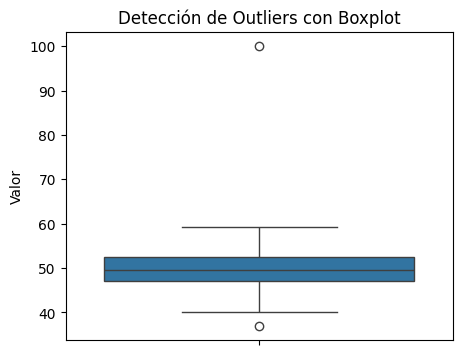

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de outliers con Boxplot
plt.figure(figsize=(5,4))
sns.boxplot(data=df['Valor'])
plt.title("Detección de Outliers con Boxplot")
plt.show()

### **Tratamiento de Outliers**
   
Eliminación de outliers

In [5]:
# Filtrar valores dentro del rango aceptable usando IQR
Q1, Q3 = np.percentile(df['Valor'], [25, 75])
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = df[(df['Valor'] >= limite_inferior) & (df['Valor'] <= limite_superior)]
print(df_sin_outliers)

        Valor   Z_score
0   52.483571  0.368618
1   49.308678 -0.101188
2   53.238443  0.480321
3   57.615149  1.127966
4   48.829233 -0.172135
..        ...       ...
94  48.039459 -0.289002
95  42.682425 -1.081712
96  51.480601  0.220203
97  51.305276  0.194259
98  50.025567  0.004894

[98 rows x 2 columns]


### **Transformación de datos** 

1. Escalado Logarítmico: 

In [6]:
df['Valor_transformado'] = np.log(df['Valor'] + 1)
df  

,Valor,Z_score,Valor_transformado
0,52.483571,0.368618,3.979375
1,49.308678,-0.101188,3.918178
2,53.238443,0.480321,3.993390
3,57.615149,1.127966,4.070993
4,48.829233,-0.172135,3.908602
...,...,...,...
95,42.682425,-1.081712,3.776946
96,51.480601,0.220203,3.960444
97,51.305276,0.194259,3.957097
98,50.025567,0.004894,3.932327


2. Winsorización

In [7]:
from scipy.stats.mstats import winsorize
df['Valor_winsorizado'] = winsorize(df['Valor'], limits=[0.05, 0.05]) 
df

,Valor,Z_score,Valor_transformado,Valor_winsorizado
0,52.483571,0.368618,3.979375,52.483571
1,49.308678,-0.101188,3.918178,49.308678
2,53.238443,0.480321,3.993390,53.238443
3,57.615149,1.127966,4.070993,57.615149
4,48.829233,-0.172135,3.908602,48.829233
...,...,...,...,...
95,42.682425,-1.081712,3.776946,42.682425
96,51.480601,0.220203,3.960444,51.480601
97,51.305276,0.194259,3.957097,51.305276
98,50.025567,0.004894,3.932327,50.025567


## <span style="color:#00bfff;">Escalado y normalización</span>

1. Normalización (Min-Max Scaling)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Crear DataFrame de ejemplo
df = pd.DataFrame({"Altura": [150, 160, 170, 180, 190], "Peso": [50, 65, 80, 90, 100]})

# Aplicar Normalización (Min-Max Scaling)
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Datos normalizados:\n", df_normalizado) 

Datos normalizados:
    Altura  Peso
0    0.00   0.0
1    0.25   0.3
2    0.50   0.6
3    0.75   0.8
4    1.00   1.0


2. Estandarización (Z-score Scaling)

In [9]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({
    "Altura": np.random.normal(loc=250, scale=1, size=100),
    "Peso": np.random.normal(loc=250, scale=1, size=100)
})

# Aplicar Estandarización (Z-score)
scaler_std = StandardScaler()
df_estandarizado = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

print("Datos estandarizados:\n", df_estandarizado)
print(f"\nMEDIA: \n{round(df_estandarizado.mean(), 2)}\n")
print(f"DESVIACIÓN ESTÁNDAR: \n{round(df_estandarizado.std(), 2)}")

Datos estandarizados:
       Altura      Peso
0  -0.282348 -1.097942
1  -1.535817  0.286554
2  -0.479859  0.473825
3  -0.397131  0.955633
4  -0.884983  0.928650
..       ...       ...
95  0.150521  0.285842
96  0.375716 -0.682747
97 -0.971585  0.786393
98  0.129867  0.239977
99  0.028471  0.706375

[100 rows x 2 columns]

MEDIA: 
Altura    0.0
Peso      0.0
dtype: float64

DESVIACIÓN ESTÁNDAR: 
Altura    1.01
Peso      1.01
dtype: float64


## <span style="color:#00bfff;">Codificación de Variables Categóricas</span>

1. Label Encoding

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crear DataFrame de ejemplo
df = pd.DataFrame({'Color': ['Rojo', 'Azul', 'Verde', 'Azul', 'Rojo']})

# Aplicar Label Encoding
encoder = LabelEncoder()
df['Color_codificado'] = encoder.fit_transform(df['Color'])

print(df)

   Color  Color_codificado
0   Rojo                 1
1   Azul                 0
2  Verde                 2
3   Azul                 0
4   Rojo                 1


2. One-Hot Encoding
   

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Color']])

# Convertir a DataFrame con nombres de columnas
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Color']))

# Eliminar la columna de la codificación anterior
df = df.drop(labels="Color_codificado", axis=1)

# Concatenar con el DataFrame original
df_final = pd.concat([df, df_encoded], axis=1)

print(df_final) 

   Color  Color_Azul  Color_Rojo  Color_Verde
0   Rojo         0.0         1.0          0.0
1   Azul         1.0         0.0          0.0
2  Verde         0.0         0.0          1.0
3   Azul         1.0         0.0          0.0
4   Rojo         0.0         1.0          0.0


## <span style="color:#00bfff;">Reducción de dimensionalidad</span>

Análisis de Componentes Principales (PCA)

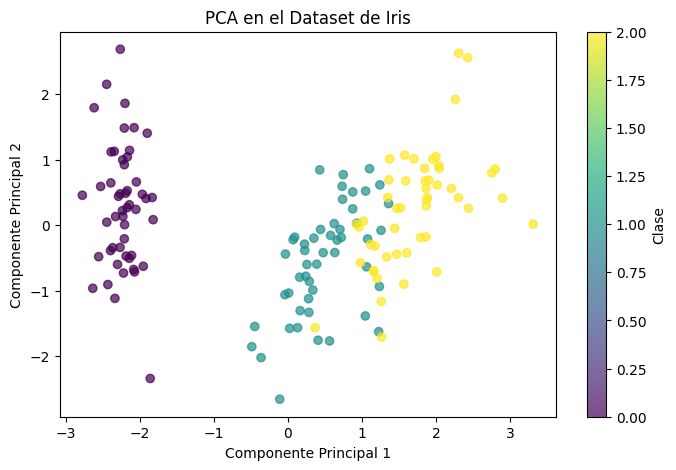

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Cargar dataset de Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Clases

# Estandarizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame
df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Clase'] = y

# Visualizar los datos reducidos a 2D
plt.figure(figsize=(8,5))
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], c=df_pca['Clase'], cmap='viridis', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA en el Dataset de Iris')
plt.colorbar(label='Clase')
plt.show()

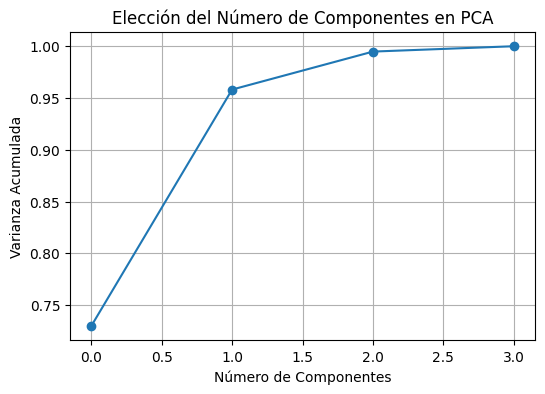

In [13]:
# Analizar la varianza explicada por cada componente
pca_full = PCA().fit(X_scaled)

# Gráfico de varianza explicada
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Elección del Número de Componentes en PCA')
plt.grid()
plt.show()

## <span style="color:#00bfff;">Preparación del Dataset</span>

### División del conjunto de datos en entrenamiento y prueba (_train and test_)

1. División Simple (Holdout)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Cargar el dataset de Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# División de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape) 

Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de prueba: (30, 4)


2. Validación Cruzada (Cross-validation)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Modelo a evaluar
modelo = RandomForestClassifier()

# Aplicar validación cruzada con 5 folds
scores = cross_val_score(modelo, X, y, cv=5)

print(f"Precisión media del modelo:{scores.mean():.2f}") 

Precisión media del modelo:0.96


3. División en Entrenamiento, Validación y Prueba (Train / Validation / Test)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris()
X, y = iris.data, iris.target

# 1. Separar conjunto de prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Separar conjunto de entrenamiento y validación a partir del conjunto restante
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# Nota: 0.25 de 80% original = 20% total → 60% train, 20% val, 20% test

print("Entrenamiento:", X_train.shape)
print("Validación:", X_val.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (90, 4)
Validación: (30, 4)
Prueba: (30, 4)
